In [1]:
%load_ext autoreload
%autoreload 2
import os
os.environ["GEOMSTATS_BACKEND"] = "pytorch"
import geomstats.backend as gs
import matplotlib.pyplot as plt
import torch

INFO: Using pytorch backend


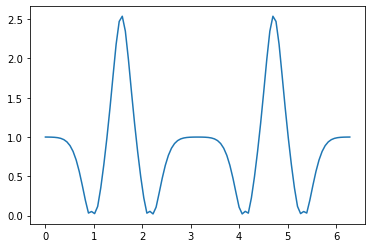

In [2]:
from datasets.synthetic import get_s1_synthetic_immersion as get_immersion
from main_eval import compute_mean_curvature

immersion = get_immersion(distortion_func="bump",radius=1,n_wiggles=3,distortion_amp=0.3,embedding_dim=2,rot=torch.eye(2))
points = gs.linspace(0,2*gs.pi,100)

mean_curvatures = gs.zeros((len(points), 2))
mean_curvature_norms = gs.zeros(len(points))
for i_point, point in enumerate(points):
    point = gs.array([[point]])
    curvature, norm = compute_mean_curvature(point, immersion, 1, 2)
    mean_curvatures[i_point] = gs.squeeze(curvature)
    mean_curvature_norms[i_point] = gs.squeeze(norm)

plt.plot(points, mean_curvature_norms);

In [30]:
from datasets.synthetic import load_s1_synthetic

data, labels = load_s1_synthetic(rot=torch.eye(2), n_times=100, radius=1, distortion_amp=0.2, embedding_dim=2, noise_var=1e-3)

torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Si

In [5]:
from main_eval import get_second_fundamental_form as sff

In [77]:
def get_immersion(radius):    
    def immersion(theta):
        return radius*gs.array([gs.cos(theta), gs.sin(theta)])
    return immersion

def get_sphere_immersion(radius):
    def immersion(point):
        theta = point[0]
        phi = point[1]
        x = gs.sin(theta)*gs.cos(phi)
        y = gs.sin(theta)*gs.sin(phi)
        z = gs.cos(theta)
        return radius*gs.array([x,y,z])
    return immersion

dim = 2
embedding_dim = 3

point = gs.array([gs.pi/3,gs.pi])

point = gs.array([0.1,0.0])

immersion = get_sphere_immersion(radius=1)


sec_fun = sff(immersion,point,dim,embedding_dim)

tensor([0.1000, 0.0000])
torch.Size([2])
tensor([[1.0000, 0.0000],
        [0.0000, 0.0100]])


In [37]:
from datasets.synthetic import get_s1_synthetic_immersion as get_immersion
from main_eval import compute_mean_curvature

immersion = get_immersion(distortion_func="bump",radius=1,n_wiggles=3,distortion_amp=0.3,embedding_dim=2,rot=torch.eye(2))
points = gs.linspace(0,2*gs.pi,100)

mean_curvatures = gs.zeros((len(points),2))
mean_curvature_norms = gs.zeros(len(points))
for _, point in enumerate(points):
    point = gs.array([[point]])
    curvature, norm = compute_mean_curvature(point, immersion, 1, 2)
    mean_curvatures[_,:] =  torch.squeeze(curvature)
    mean_curvature_norms[_] = norm

In [122]:
from datasets.synthetic import get_s2_synthetic_immersion
from main_eval import compute_mean_curvature

immersion = get_s2_synthetic_immersion(radius=1,distortion_amp=0.3,embedding_dim=3,rot=torch.eye(3))

thetas = gs.linspace(0.01,gs.pi,100)
phis = gs.linspace(0,2*gs.pi,100)

points = torch.cartesian_prod(thetas,phis)


mean_curvatures = gs.zeros((len(points),3))

mean_curvature_norms = gs.zeros(len(points))

for _, point in enumerate(points):
    point = gs.array([point])
    curvature, norm = compute_mean_curvature(point,immersion, 2, 3)
    mean_curvatures[_,:] =  torch.squeeze(curvature)
    mean_curvature_norms[_] = norm

    


KeyboardInterrupt: 

torch.Size([10000])

In [50]:
from scipy.integrate import dblquad 
import numpy as np

def func(phi, theta):
    return np.sin(theta)



I = dblquad(func, 0, np.pi, 0, 2*np.pi)

In [113]:
angles = points

In [115]:
len(angles)

10000

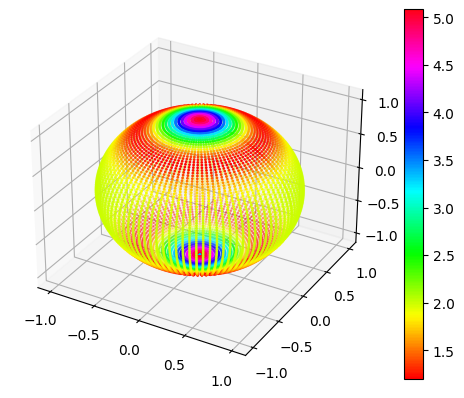

In [119]:
x = [np.sin(angle[0])*np.cos(angle[1]) for angle in angles]
y = [np.sin(angle[0])*np.sin(angle[1]) for angle in angles]
z = [np.cos(angle[0]) for angle in angles]

fig = plt.figure()

ax = fig.add_subplot(111,projection="3d")
sc = ax.scatter3D(x,y,z,s=1,c=mean_curvature_norms,cmap="hsv")

plt.colorbar(sc)

In [123]:
len(mean_curvature_norms)

10000

In [124]:
def double_Integral(xmin, xmax, ymin, ymax, nx, ny, A):

    dS = ((xmax-xmin)/(nx-1)) * ((ymax-ymin)/(ny-1))

    A_Internal = A[1:-1, 1:-1]

    # sides: up, down, left, right
    (A_u, A_d, A_l, A_r) = (A[0, 1:-1], A[-1, 1:-1], A[1:-1, 0], A[1:-1, -1])

    # corners
    (A_ul, A_ur, A_dl, A_dr) = (A[0, 0], A[0, -1], A[-1, 0], A[-1, -1])

    return dS * (np.sum(A_Internal)\
                + 0.5 * (np.sum(A_u) + np.sum(A_d) + np.sum(A_l) + np.sum(A_r))\
                + 0.25 * (A_ul + A_ur + A_dl + A_dr))

In [127]:
mean_curvature_norms.shape

torch.Size([10000])

In [ ]:
mean_curv = np.zeros((len(thetas),len(phis)))



In [125]:
points.shape

torch.Size([10000, 2])

In [126]:
thetas.shape

torch.Size([100])

In [135]:
A = torch.ones_like(mean_curvature_norms)

In [136]:
for t, theta in enumerate(thetas):
    sum_phis = torch.zeros_like(thetas)*np.sin(thetas)
    for p, phi in enumerate(phis):
      sum_phis[t] = torch.trapz(A[len(phis)*p:len(phis)*(p+1)],x=phis)
      print(sum_phis[t])

integral = torch.trapz(sum_phis,thetas)


In [137]:
integral

tensor(0.0994)

In [138]:
sum_phis.shape

torch.Size([100])

In [134]:
sum_phis

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        6.2832])